In [1]:
import nltk
import sklearn
import numpy
import pandas
import sys
import os

# #1.LOAD THE DATASET


In [2]:
os.chdir("C:/Users/kc/Desktop/SMSspam")

In [3]:
import pandas as pd
import numpy as np

# load the dataset of SMS messages
df = pd.read_table('SMSSPamCollection', header=None, encoding='utf-8')

C:\Users\kc\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """


In [4]:
# print useful information about the dataset
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
0    5572 non-null object
1    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB
None
      0                                                  1
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [5]:
# check class distribution class 0 is worked as an idenntifier
classes = df[0]
print(classes.value_counts())

ham     4825
spam     747
Name: 0, dtype: int64


# #2.DATA PROCESSING

In [6]:
from sklearn.preprocessing import LabelEncoder
# convert class labels to binary values, 0 = ham and 1 = spam
encoder = LabelEncoder()
Y = encoder.fit_transform(classes)

#Y is target element or say predictor
print(Y[0:50])

[0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0]


In [7]:
# store the SMS message data and class 1 represent the text message in dataset
text_messages = df[1]
print(text_messages[:50])

0     Go until jurong point, crazy.. Available only ...
1                         Ok lar... Joking wif u oni...
2     Free entry in 2 a wkly comp to win FA Cup fina...
3     U dun say so early hor... U c already then say...
4     Nah I don't think he goes to usf, he lives aro...
5     FreeMsg Hey there darling it's been 3 week's n...
6     Even my brother is not like to speak with me. ...
7     As per your request 'Melle Melle (Oru Minnamin...
8     WINNER!! As a valued network customer you have...
9     Had your mobile 11 months or more? U R entitle...
10    I'm gonna be home soon and i don't want to tal...
11    SIX chances to win CASH! From 100 to 20,000 po...
12    URGENT! You have won a 1 week FREE membership ...
13    I've been searching for the right words to tha...
14                  I HAVE A DATE ON SUNDAY WITH WILL!!
15    XXXMobileMovieClub: To use your credit, click ...
16                           Oh k...i'm watching here:)
17    Eh u remember how 2 spell his name... Yes 

Now we deal with the regular expression in this special characters like '@' etc 
We can also do this with a python inbuilt library for for regular expression 
for this particular project we do not this library 

DEAL WITH REGULAR EXPRESSION FOR EACH EMAIL,URL etc. we have differen format of regular expression here 'r' represent regular expression
r'^.+@[^\.].*\.[a-z]{2,}$' - expression for email format
r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$' - expression for URL format
r'£|\$' - expression for money symbols
r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$' - expression for phone number in USA format(3-3-4)
r'\d+(\.\d+)?' - regular expression for any random number

In [8]:
# use regular expressions to replace email addresses, URLs, phone numbers, other numbers
# Replace email addresses with 'email'
processed = text_messages.str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

In [9]:
# Replace URLs with 'webaddress'
processed = processed.str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

In [10]:
# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
processed = processed.str.replace(r'£|\$', 'moneysymb')

In [11]:
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
processed = processed.str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumbr')

In [12]:
# Replace numbers with 'numbr'
processed = processed.str.replace(r'\d+(\.\d+)?', 'numbr')

In [13]:
# Remove punctuation
processed = processed.str.replace(r'[^\w\d\s]', ' ')


In [14]:
# Replace whitespace between terms with a single space
processed = processed.str.replace(r'\s+', ' ')

In [15]:
# Remove leading and trailing whitespace
processed = processed.str.replace(r'^\s+|\s+?$', '')

In [16]:
# change words to lower case - Hello, HELLO, hello are all the same word
processed = processed.str.lower()

In [17]:
print(processed)

0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in numbr a wkly comp to win fa cup ...
3             u dun say so early hor u c already then say
4       nah i don t think he goes to usf he lives arou...
5       freemsg hey there darling it s been numbr week...
6       even my brother is not like to speak with me t...
7       as per your request melle melle oru minnaminun...
8       winner as a valued network customer you have b...
9       had your mobile numbr months or more u r entit...
10      i m gonna be home soon and i don t want to tal...
11      six chances to win cash from numbr to numbr nu...
12      urgent you have won a numbr week free membersh...
13      i ve been searching for the right words to tha...
14                      i have a date on sunday with will
15      xxxmobilemovieclub to use your credit click th...
16                                 oh k i m watching here
17      eh u r

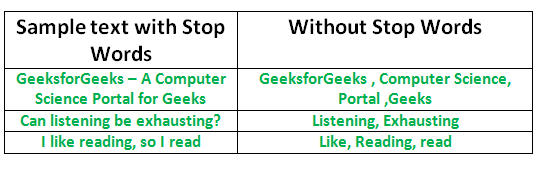

In [18]:
from nltk.corpus import stopwords

# remove stop words from text messages

stop_words = set(stopwords.words('english'))

processed = processed.apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

The idea of stemming is a sort of normalizing method. Many variations of words carry the same meaning, other than when tense is involved.

The reason why we stem is to shorten the lookup, and normalize sentences.

Consider:

I was taking a ride in the car.
I was riding in the car.
This sentence means the same thing. in the car is the same. I was is the same. the ing denotes a clear past-tense in both cases, so is it truly necessary to differentiate between ride and riding, in the case of just trying to figure out the meaning of what this past-tense activity was?

No, not really.

This is just one minor example, but imagine every word in the English language, every possible tense and affix you can put on a word. Having individual dictionary entries per version would be highly redundant and inefficient, especially since, once we convert to numbers, the "value" is going to be identical.

One of the most popular stemming algorithms is the Porter stemmer, which has been around since 1979.

In [19]:
# Remove word stems using a Porter stemmer
ps = nltk.PorterStemmer()

processed = processed.apply(lambda x: ' '.join(
    ps.stem(term) for term in x.split()))

Pick out the bag of word that are most frequently used

In [20]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
from nltk.tokenize import word_tokenize

# create bag-of-words
all_words = []

for message in processed:
    words = word_tokenize(message)
    for w in words:
        all_words.append(w)
        
all_words = nltk.FreqDist(all_words)

In [22]:
# print the total number of words and the 15 most common words
print('Number of words: {}'.format(len(all_words)))
print('Most common words: {}'.format(all_words.most_common(15)))

Number of words: 6579
Most common words: [('numbr', 2648), ('u', 1207), ('call', 674), ('go', 456), ('get', 451), ('ur', 391), ('gt', 318), ('lt', 316), ('come', 304), ('moneysymbnumbr', 303), ('ok', 293), ('free', 284), ('day', 276), ('know', 275), ('love', 266)]


In [23]:
# use the 2000 most common words as features
word_features = list(all_words.keys())[:2000]

In [24]:
# The find_features function will determine which of the 1500 word features are contained in the review
def find_features(message):
    words = word_tokenize(message)
    features = {}
    for word in word_features:
        features[word] = (word in words)

    return features

# Lets see an example!
features = find_features(processed[0])
for key, value in features.items():
    if value == True:
        print(key)

go
jurong
point
crazi
avail
bugi
n
great
world
la
e
buffet
cine
got
amor
wat


In [25]:
# Now lets do it for all the messages
messages = zip(processed, Y)

# define a seed for reproducibility
seed = 1
np.random.seed = seed
#np.random.shuffle(messages)

# call find_features function for each SMS message
featuresets = [(find_features(text), label) for (text, label) in messages]

In [26]:
# we can split the featuresets into training and testing datasets using sklearn
from sklearn import model_selection

# split the data into training and testing datasets
training, testing = model_selection.train_test_split(featuresets, test_size = 0.25, random_state=seed)

In [27]:
print(len(training))
print(len(testing))

4179
1393


In [28]:
print(training)
print(testing)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# #Scikit-Learn Classifiers with NLTK


In [29]:
# We can use sklearn algorithms in NLTK
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.svm import SVC

model = SklearnClassifier(SVC(kernel = 'linear'))

# train the model on the training data
model.train(training)

# and test on the testing dataset!
accuracy = nltk.classify.accuracy(model, testing)*100
print("SVC Accuracy: {}".format(accuracy))

SVC Accuracy: 98.85139985642498


In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Define models to train
names = ["K Nearest Neighbors", "Decision Tree", "Random Forest", "Logistic Regression", "SGD Classifier",
         "Naive Bayes", "SVM Linear"]

classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    SGDClassifier(max_iter = 100),
    MultinomialNB(),
    SVC(kernel = 'linear')
]

models = zip(names, classifiers)

for name, model in models:
    nltk_model = SklearnClassifier(model)
    nltk_model.train(training)
    accuracy = nltk.classify.accuracy(nltk_model, testing)*100
    print("{} Accuracy: {}".format(name, accuracy))

K Nearest Neighbors Accuracy: 94.40057430007178
Decision Tree Accuracy: 97.4156496769562


C:\Users\kc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Accuracy: 98.06173725771716


C:\Users\kc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Accuracy: 98.7078248384781
SGD Classifier Accuracy: 98.49246231155779
Naive Bayes Accuracy: 98.7078248384781
SVM Linear Accuracy: 98.85139985642498


In [31]:
# Ensemble methods - Voting classifier
from sklearn.ensemble import VotingClassifier

names = ["K Nearest Neighbors", "Decision Tree", "Random Forest", "Logistic Regression", "SGD Classifier",
         "Naive Bayes", "SVM Linear"]

classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    SGDClassifier(max_iter = 100),
    MultinomialNB(),
    SVC(kernel = 'linear')
]

models = zip(names, classifiers)

nltk_ensemble = SklearnClassifier(VotingClassifier(estimators = models, voting = 'hard', n_jobs = -1))
#nltk_ensemble.train(training)
accuracy = nltk.classify.accuracy(nltk_model, testing)*100
print("Voting Classifier: Accuracy: {}".format(accuracy))

Voting Classifier: Accuracy: 98.85139985642498
